I imported the essential libraries for data analysis and visualization. I used pandas for handling and manipulating the dataset, matplotlib.pyplot for creating basic visual plots, and seaborn for more advanced and aesthetically pleasing statistical visualizations. These libraries provide the tools needed to explore patterns, trends, and relationships in the insurance data.

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I loaded the insurance.csv dataset and used df.head() to preview the first few rows. This confirmed the file was read correctly and gave a quick overview of the data structure. The dataset includes both numerical and categorical features, with charges likely being the target variable. A noticeable pattern is that the first row, a 19-year-old female smoker, has much higher charges than non-smokers, suggesting smoking may strongly impact costs. The data appears clean and ready for further analysis.

In [5]:
#loading the dataset
df = pd.read_csv('Downloads/insurance.csv')

#displaying results
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


I used df.info() to check the structure and data types of the dataset. This helps confirm that the dataset was loaded correctly and allows me to assess whether any cleaning is needed. I observed that the dataset has 1,338 entries and 7 columns, with no missing values in any column. The features are a mix of integers, floats, and objects (categorical variables like sex, smoker, and region).

In [8]:
#displaying dataset structure and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


I used df.describe(include='all') to view summary statistics for both numerical and categorical columns. This helped me understand the distribution and key values for each feature. For instance, the average age is about 39, and average insurance charges are around $13,270, with a wide range up to over $63,000. Among categorical variables, most individuals are male, non-smokers, and from the southeast region. These insights are useful for identifying patterns and preparing features for modeling.

In [10]:
#showing summary statistics for all columns
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


I checked the dataset for missing values and duplicate rows to ensure data quality. The output showed no missing values across any columns (also shown earlier with df.info()), which means no imputation is needed. I also found one duplicate row using df.duplicated().sum(). To clean the dataset, I removed it with df.drop_duplicates() and confirmed that the duplicate was successfully removed. This ensures the dataset is accurate and ready for analysis.

In [13]:
#checking for missing values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking for duplicate rows.

In [17]:
#checking for duplicate rows in the dataset
df.duplicated().sum()

1

In [39]:
#removing duplicate rows from the dataset
df = df.drop_duplicates()

#confirming the duplicate is removed
df.duplicated().sum()

0

I separated the columns into numerical and categorical features using select_dtypes. This helps organize the data based on type, which is useful for preprocessing steps like encoding or scaling. The output shows that age, bmi, children, and charges are numerical, while sex, smoker, and region are categorical. Identifying these groups early makes it easier to apply the right transformations during modeling.

In [42]:
#identifying numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#identifying categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

#displaying column type lists
print("numerical features:", numerical_features)
print("categorical features:", categorical_features)

numerical features: ['age', 'bmi', 'children', 'charges']
categorical features: ['sex', 'smoker', 'region']


I created histograms with KDE (kernel density estimation) curves to visualize the distribution of all numerical features. This helps identify data skewness, outliers, and general patterns. The age distribution is fairly uniform, with a noticeable spike at 18–19, possibly due to younger individuals entering the system. The bmi distribution is slightly right-skewed, centered around 30, indicating a tendency toward overweight values. The children feature is heavily skewed toward 0, showing most individuals have no children. The charges distribution is also right-skewed, with most costs clustered at the lower end but a few very high values, suggesting potential outliers that could impact regression modeling later.

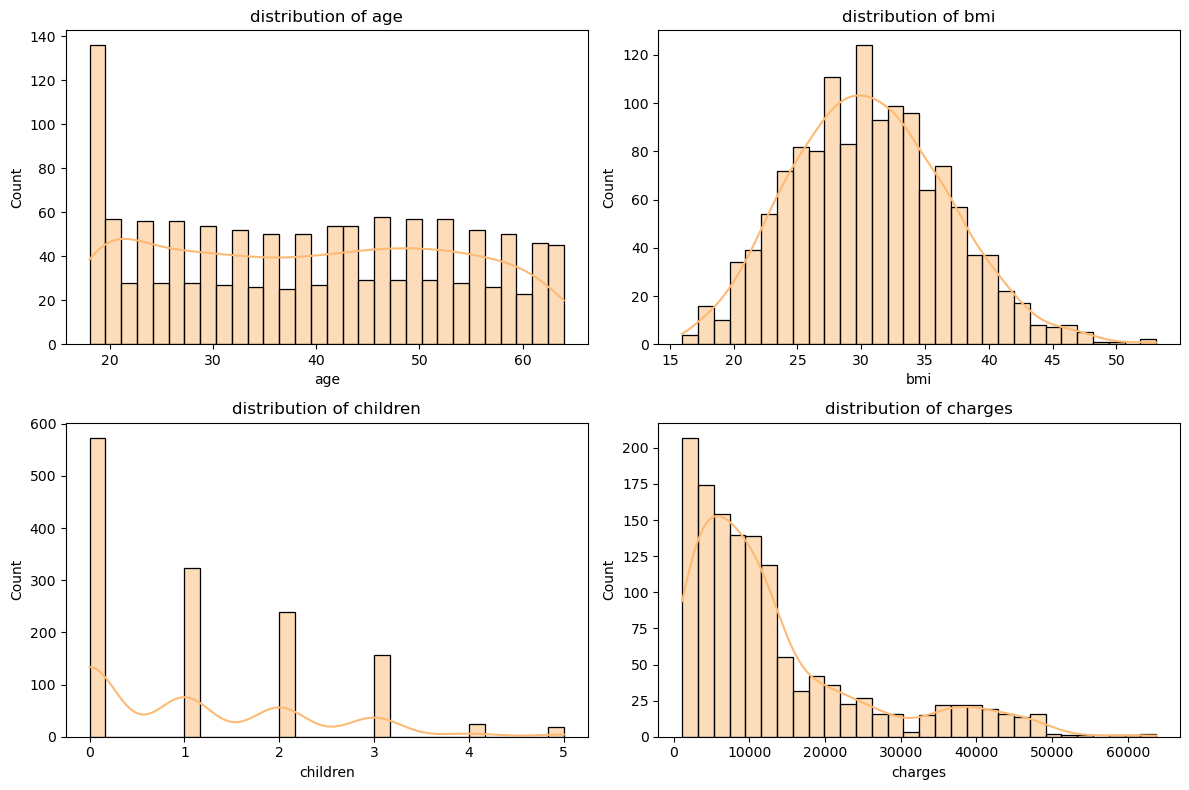

In [45]:
#plotting histograms with kde for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='#FDBA74')
    plt.title(f'distribution of {col}')
plt.tight_layout()
plt.show()

I used boxplots to visually detect outliers in the numerical features. From the plots, age appears to be evenly distributed with no major outliers. However, bmi has a few high-value outliers, and charges shows a significant number of extreme values on the upper end, confirming what was seen in the earlier histogram. The children feature is more discrete, but the upper range values also stand out. These visual cues suggest that some features, especially charges, may benefit from transformation or outlier handling before modeling.

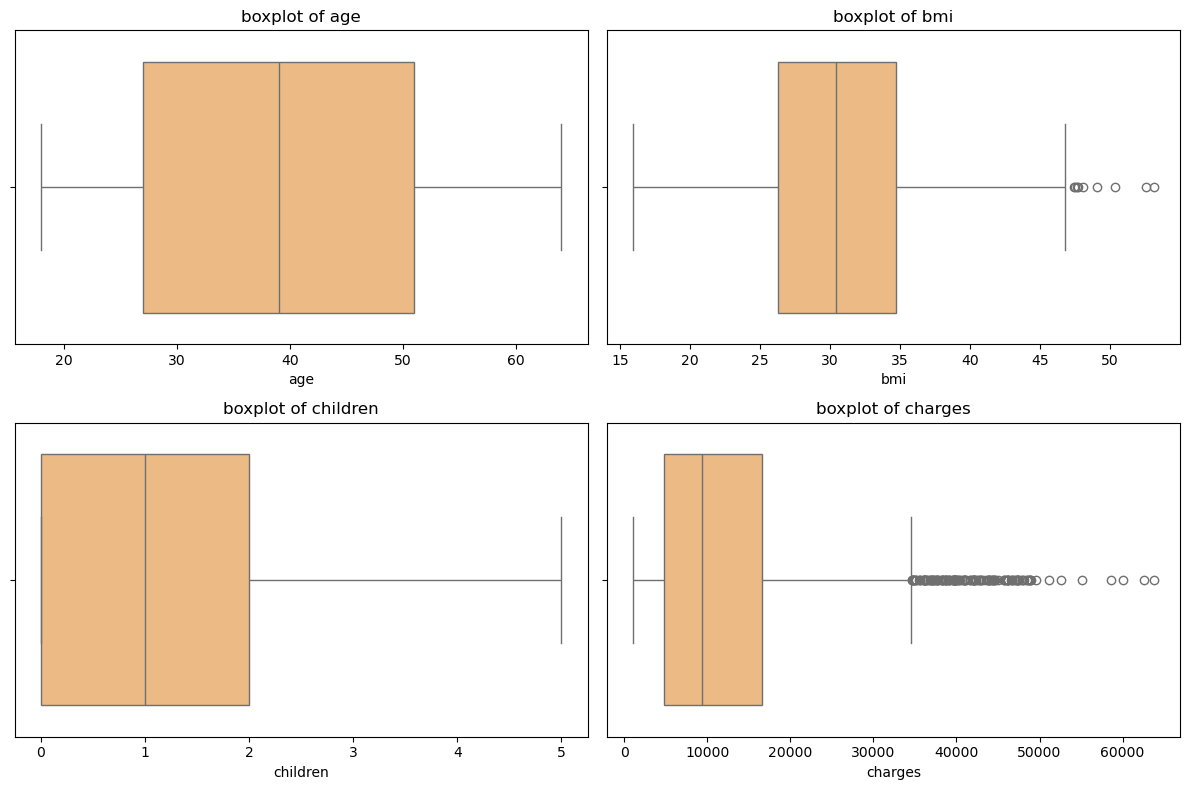

In [66]:
#building and displaying boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='#FDBA74')
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()

I calculated and visualized the correlation matrix for the numerical features using a heatmap. This helps identify which features have linear relationships with the target variable, charges. From the heatmap, age has the strongest correlation with charges (0.30), followed by bmi (0.20). The children feature shows very little correlation (0.07), suggesting it may not be a strong predictor.

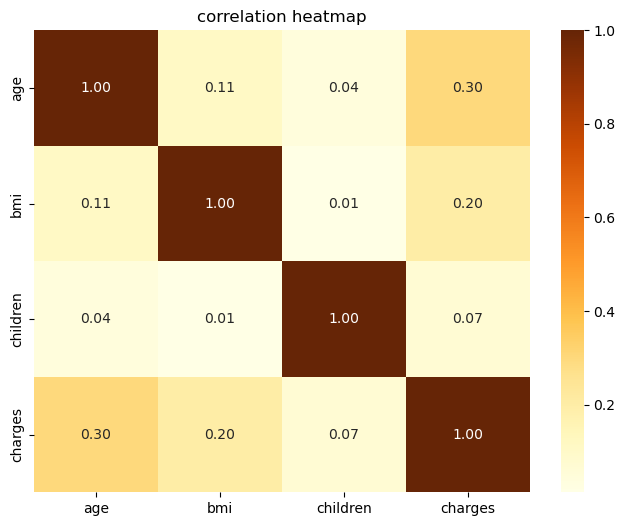

In [69]:
#calculating correlation matrix
correlation_matrix = df.corr(numeric_only=True)

#plotting heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('correlation heatmap')
plt.show()

I created a scatterplot of BMI versus insurance charges, using color to differentiate smokers and non-smokers. The plot clearly shows that smokers (blue dots) generally incur much higher charges than non-smokers (orange dots), even at similar BMI levels. This visual strongly supports the idea that smoking is a major factor influencing medical costs and should be treated as a key feature in any predictive modeling.

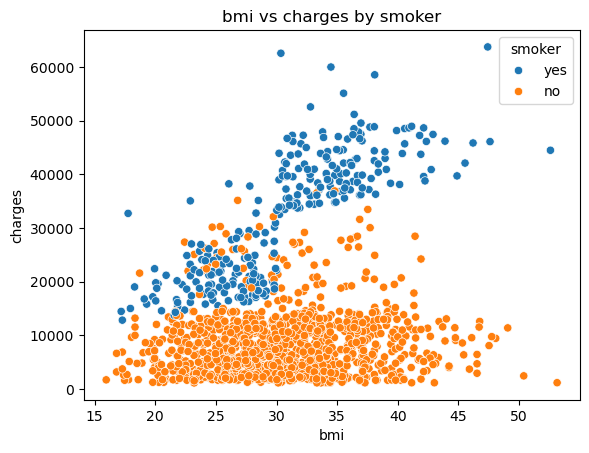

In [72]:
#scatterplot of bmi vs charges, colored by smoker
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('bmi vs charges by smoker')
plt.show()

Data Source Description:

The dataset used is insurance.csv, which contains 1,338 records of individuals’ demographics and insurance charges. It includes 7 columns:

-age (int): Age of the individual

-sex (object): Gender (male/female)

-bmi (float): Body Mass Index

-children (int): Number of children

-smoker (object): Smoking status (yes/no)

-region (object): Residential area

-charges (float): Medical insurance cost (target variable)

1. What types of variables are there in the dataset?

There are two types of variables: numerical and categorical.

Numerical: age, bmi, children, charges

Categorical: sex, smoker, region

2. What do their distributions look like?

-age and bmi are fairly normally distributed.

-charges is right-skewed with a heavy tail due to high-cost outliers (mainly smokers).

-children is discrete, with common counts around 0–2.

3. Do you have missing values?
   
No. All columns contain complete data with no missing values.

4. Are there redundant features?
   
There was a duplicate row, which was detected and removed. No redundant columns exist.

5. What are the relationships between the main features?

-smoker is strongly associated with higher charges.

-age and charges have a positive relationship.

-bmi has a mild influence, especially among smokers.

-children, sex, and region show weaker or no strong correlation.

6. Do you observe outliers?

Yes.

-charges contains high-value outliers from smokers

-bmi also shows a few extreme cases, potentially indicating obesity

7. How do the different pairs of features correlate with one another?

-age and charges: ~0.30 (moderate positive)

-bmi and charges: ~0.20 (weak positive)

-children and charges: near 0 (very weak)

These were confirmed visually with a heatmap and scatterplots.

8. Do these correlations make sense?
   
Yes.
They align with medical expectations. Older individuals and smokers generally incur higher insurance costs. BMI also impacts charges, especially in unhealthy ranges.

9. What is the relationship between the features and the target?

-smoker status has the strongest influence on charges

-age and bmi also contribute but to a lesser extent

-Categorical variables like region and sex show minimal effect

10. Have you confirmed or rejected your hypothesis?
    
My hypothesis has been confirmed.
Smokers and older individuals clearly have higher insurance costs, validating the assumption that these features drive charges upward.

11. What do you know now that will inform the modeling strategy?

-Categorical features (sex, smoker, region) must be encoded

-charges is skewed and might benefit from a log transformation.

-Feature importance: smoker, age, and bmi are key predictors.

Outliers should be handled carefully, especially if using models sensitive to scale.

SELF NOTES: Interesting to know that visulaizations do not only come in at the end of data projects, but also throughout the whole thing. 